In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv1D, MaxPooling1D
from keras.layers import Dropout, Activation, Flatten, LSTM
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras import backend as K
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications import VGG16
import cv2
from keras.preprocessing import sequence
import requests
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:

from google.colab import files

uploaded = files.upload()

Saving simpletest1.csv to simpletest1.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "simpletest1.csv" with length 3404139 bytes


In [0]:
import pandas as pd
df = pd.read_csv("simpletest1.csv")

In [0]:
from pandas import *
df["text"] = df["text"].astype(str)
labelnew = df["stars"].tolist()
totalnew = df["text"].tolist()

In [9]:
charsnew = sorted(list(set(''.join(totalnew))))
print('total chars:', len(charsnew))
char_indices_n = dict((c, i) for i, c in enumerate(charsnew))
indices_char_n = dict((i, c) for i, c in enumerate(charsnew))
maxlen_n = max(len(i) for i in totalnew)

total chars: 27


In [0]:
X = np.zeros((len(totalnew), maxlen_n, len(charsnew)), dtype=np.uint8)
for i, seq in enumerate(totalnew):
    for t, char in enumerate(seq):
        X[i, t, char_indices_n[char]] = 1

x_train, x_test, y_train, y_test = train_test_split(X, labelnew, test_size=0.2, random_state=42)

In [11]:
#x_train[100][1]
maxlen_n

4302

In [31]:
x_test.shape

(1920, 4302, 27)

In [14]:
len(y_train)

10240

In [34]:
model2 = Sequential()
model2.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu', input_shape=(maxlen_n, len(charsnew))))
model2.add(MaxPooling1D(pool_size=5))
model2.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=5))
model2.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=5))
model2.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=5))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

fitresult = model2.fit(x_train, y_train,
                   epochs = 15,
                   batch_size = 128,
          validation_data=(x_test, y_test))

Train on 7680 samples, validate on 1920 samples
Epoch 1/15
7680/7680 [==============================] - 12s 2ms/step - loss: 0.6825 - acc: 0.5694 - val_loss: 0.6743 - val_acc: 0.5938
Epoch 2/15
7680/7680 [==============================] - 11s 1ms/step - loss: 0.6795 - acc: 0.5794 - val_loss: 0.6717 - val_acc: 0.5969
Epoch 3/15
7680/7680 [==============================] - 11s 1ms/step - loss: 0.6690 - acc: 0.5926 - val_loss: 0.6043 - val_acc: 0.6984
Epoch 4/15
7680/7680 [==============================] - 11s 1ms/step - loss: 0.5683 - acc: 0.7102 - val_loss: 0.5333 - val_acc: 0.7484
Epoch 5/15
7680/7680 [==============================] - 11s 1ms/step - loss: 0.4782 - acc: 0.7772 - val_loss: 0.4535 - val_acc: 0.7875
Epoch 6/15
7680/7680 [==============================] - 11s 1ms/step - loss: 0.4195 - acc: 0.8133 - val_loss: 0.4367 - val_acc: 0.8005
Epoch 7/15
7680/7680 [==============================] - 11s 1ms/step - loss: 0.3803 - acc: 0.8309 - val_loss: 0.4204 - val_acc: 0.8052
Epoch 8

In [35]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 4302, 128)         17408     
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 860, 128)          0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 860, 128)          82048     
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 172, 128)          0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 172, 128)          82048     
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 34, 128)           0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 34, 128)           82048     
__________

In [36]:
score = model2.evaluate(x_test, y_test, verbose=1)
print(score)

1920/1920 [==============================] - 2s 785us/step
[0.7618287059168021, 0.7947916666666667]


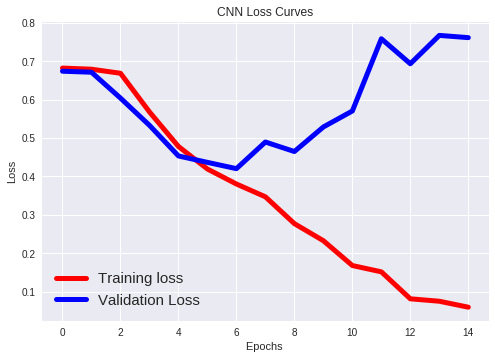

In [40]:
fig1 = plt.figure()
plt.plot(fitresult.history['loss'], linewidth = 5, color = 'red')
plt.plot(fitresult.history['val_loss'], linewidth = 5, color = 'blue')
plt.legend(['Training loss', 'Validation Loss'], fontsize=15)
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('CNN Loss Curves')
plt.show()

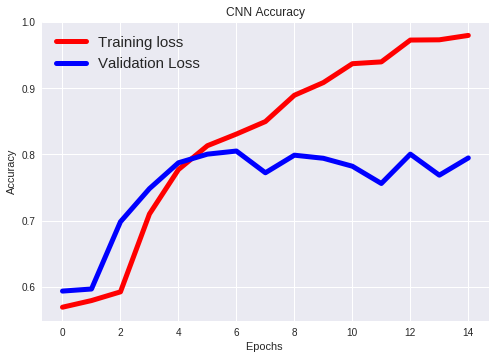

In [41]:
fig2 = plt.figure()
plt.plot(fitresult.history['acc'], linewidth = 5, color = 'red')
plt.plot(fitresult.history['val_acc'], linewidth = 5, color = 'blue')
plt.legend(['Training loss', 'Validation Loss'], fontsize=15)
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy')
plt.show()